# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn import decomposition

# Loading data from csv file

In [2]:
data = pd.read_csv('/home/vipin/Downloads/sign-language-mnist/sign_mnist_train.csv')
data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [3]:
label = data['label']

In [4]:
class_name = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','K','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
def la(x):
    return class_name[x]

In [5]:
label = label.map(la)

In [6]:
label

0        D
1        G
2        C
3        C
4        N
        ..
27450    N
27451    U
27452    P
27453    O
27454    U
Name: label, Length: 27455, dtype: object

In [7]:

label.unique()

array(['D', 'G', 'C', 'N', 'I', 'T', 'P', 'K', 'R', 'O', 'Q', 'S', 'U',
       'V', 'B', 'M', 'L', 'E', 'A', 'F', 'H'], dtype=object)

In [8]:
data = data.drop('label', axis=1)

In [9]:
data.head(5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


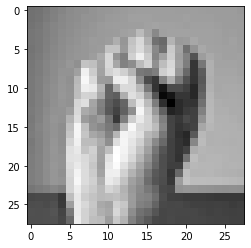

'P'

In [10]:
index = 10
grid = data.iloc[index].values.reshape(28,28)
plt.imshow(grid, cmap='gray')
plt.show()
label[index]

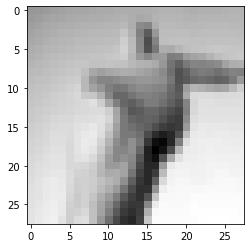

'Q'

In [11]:
index = 101
grid = data.iloc[index].values.reshape(28,28)
plt.imshow(grid, cmap='gray')
plt.show()
label[index]

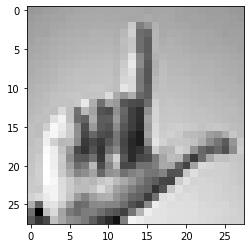

'L'

In [12]:
index = 1012
grid = data.iloc[index].values.reshape(28,28)
plt.imshow(grid, cmap='gray')
plt.show()
label[index]

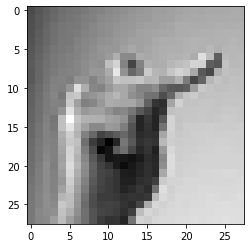

'Q'

In [13]:
index = 20000
grid = data.iloc[index].values.reshape(28,28)
plt.imshow(grid, cmap='gray')
plt.show()
label[index]

# Standardizing the data

In [14]:
ss = StandardScaler()
data = ss.fit_transform(data)

In [15]:
data

array([[-0.92895113, -0.76362507, -0.62085156, ...,  0.66406257,
         0.65811336,  0.65493948],
       [ 0.23165213,  0.2128048 ,  0.12168008, ..., -0.93157535,
        -0.41091344, -0.16809718],
       [ 1.00538763,  0.98894136,  0.94102534, ...,  0.52187701,
         0.51662452,  0.54623652],
       ...,
       [ 0.69105758,  0.63842807,  0.58256179, ...,  0.63246578,
         0.61095041,  0.62388149],
       [ 0.76359529,  0.81368471,  0.83860719, ..., -1.54771277,
        -1.16552059, -1.03772083],
       [ 0.81195376,  0.78864805,  0.73618903, ...,  0.67986097,
         0.75243925,  0.8568164 ]])

# Applying dimensionality reduction

In [16]:
#first technique we will use is PCA
pca = decomposition.PCA()
pca.n_components=2
pca_data = pca.fit_transform(data)

In [17]:
pca_data.shape

(27455, 2)

In [18]:
pca_data = pca_data.T

In [19]:
pca_data = np.vstack((pca_data, label)).T

In [20]:
pca_df = pd.DataFrame(data=pca_data, columns=('dim1', 'dim2', 'labels'))

In [21]:
pca_df

,dim1,dim2,labels
0,4.55673,-0.764484,D
1,6.60522,4.60954,G
2,-0.530982,20.3128,C
3,-9.80823,20.5375,C
4,-6.74286,2.87526,N
...,...,...,...
27450,-6.26839,-5.00377,N
27451,0.00752938,4.02795,U
27452,-4.20582,9.28557,P
27453,-18.9015,-10.7965,O


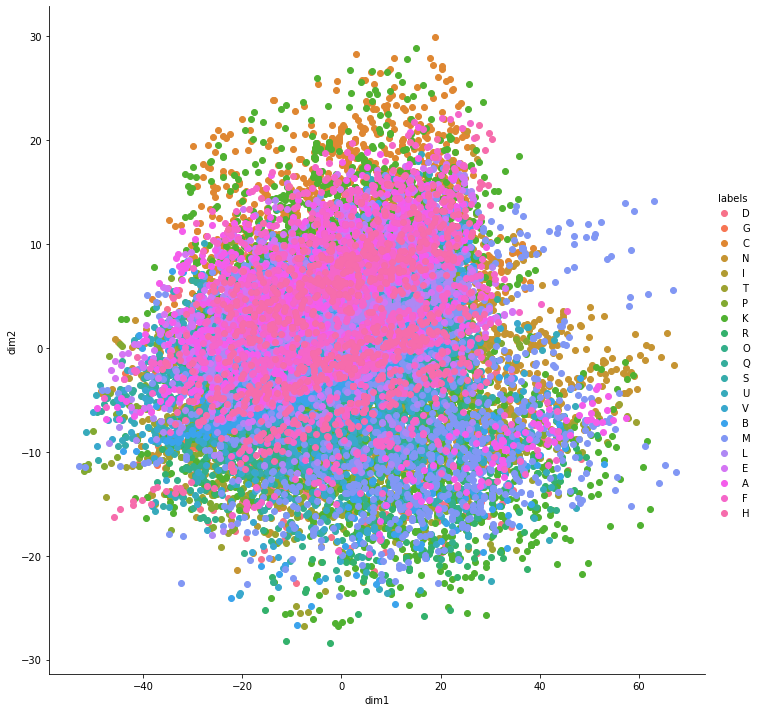

In [22]:
sns.FacetGrid(pca_df, hue='labels', height=10).map(plt.scatter, 'dim1', 'dim2').add_legend()

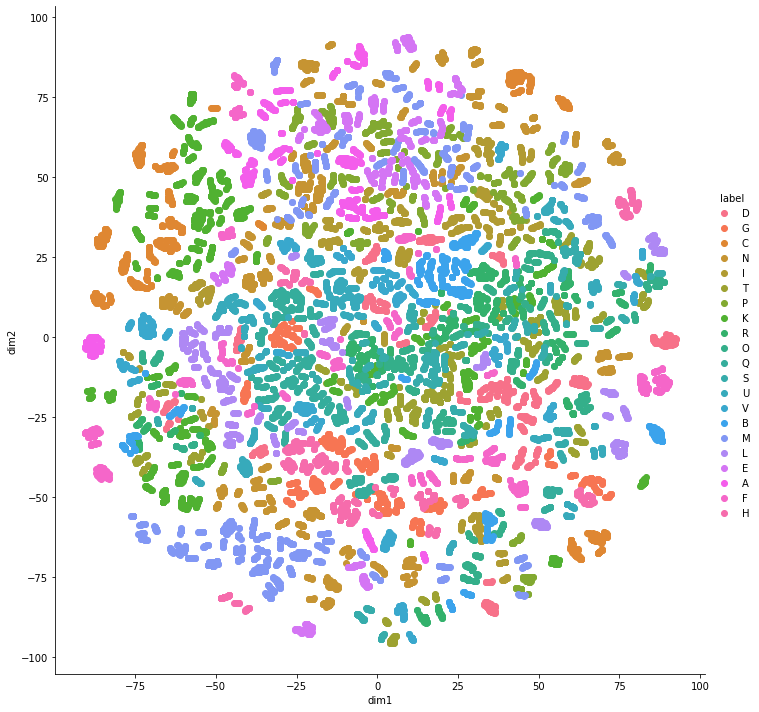

In [23]:
#APPLYING TSNE FOR DIMENSIONALTY REDUCTION
model = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=1000)
tsne_data = model.fit_transform(data)

tsne_data = np.vstack((tsne_data.T, label)).T
df_tsne = pd.DataFrame(data= tsne_data, columns=('dim1', 'dim2', 'label'))

sns.FacetGrid(df_tsne, hue='label', height=10).map(plt.scatter, 'dim1', 'dim2').add_legend()

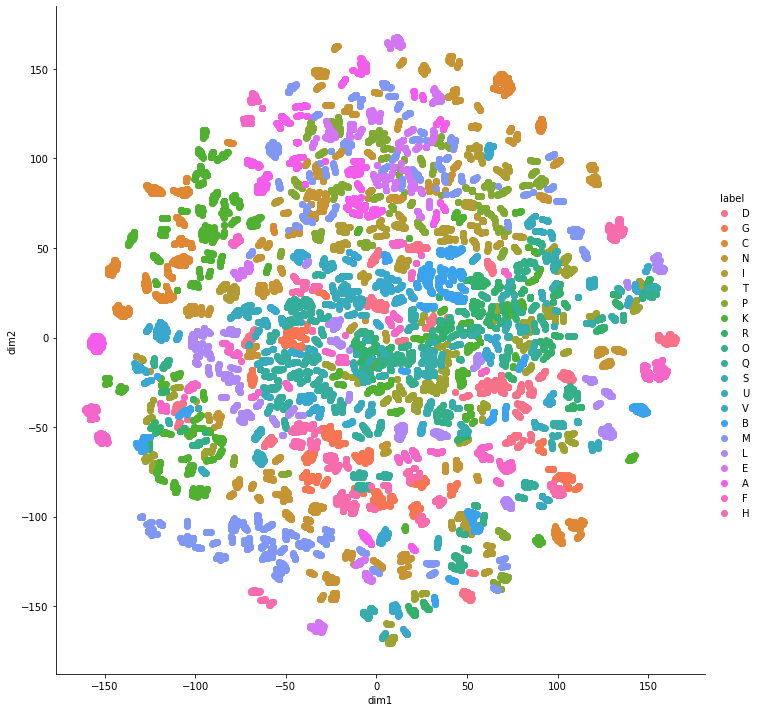

In [24]:
#APPLYING TSNE FOR DIMENSIONALTY REDUCTION
model = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=2000)
tsne_data = model.fit_transform(data)

tsne_data = np.vstack((tsne_data.T, label)).T
df_tsne = pd.DataFrame(data= tsne_data, columns=('dim1', 'dim2', 'label'))

sns.FacetGrid(df_tsne, hue='label', height=10).map(plt.scatter, 'dim1', 'dim2').add_legend()

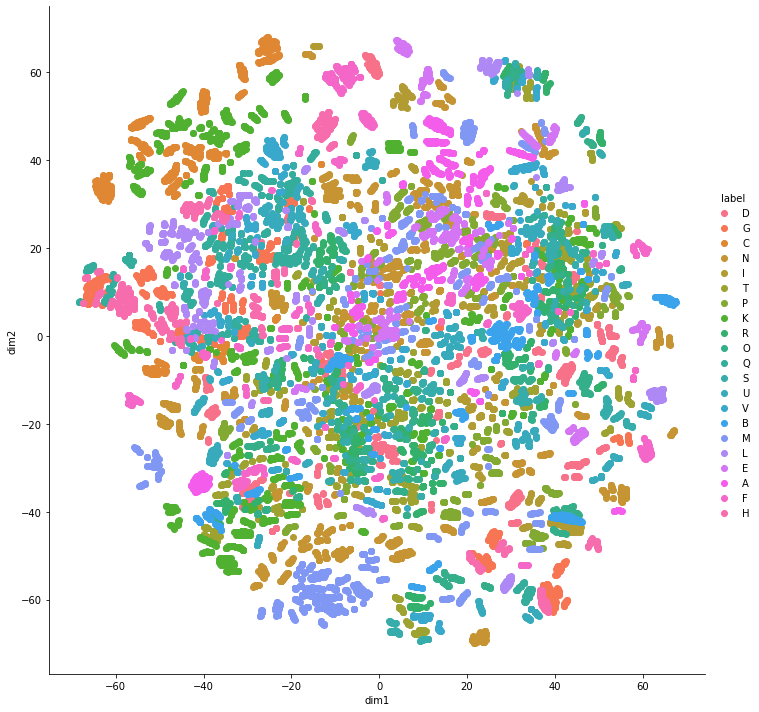

In [25]:
#APPLYING TSNE FOR DIMENSIONALTY REDUCTION
model = TSNE(n_components=2, random_state=0, perplexity=130, n_iter=1000)
tsne_data = model.fit_transform(data)

tsne_data = np.vstack((tsne_data.T, label)).T
df_tsne = pd.DataFrame(data= tsne_data, columns=('dim1', 'dim2', 'label'))

sns.FacetGrid(df_tsne, hue='label', height=10).map(plt.scatter, 'dim1', 'dim2').add_legend()

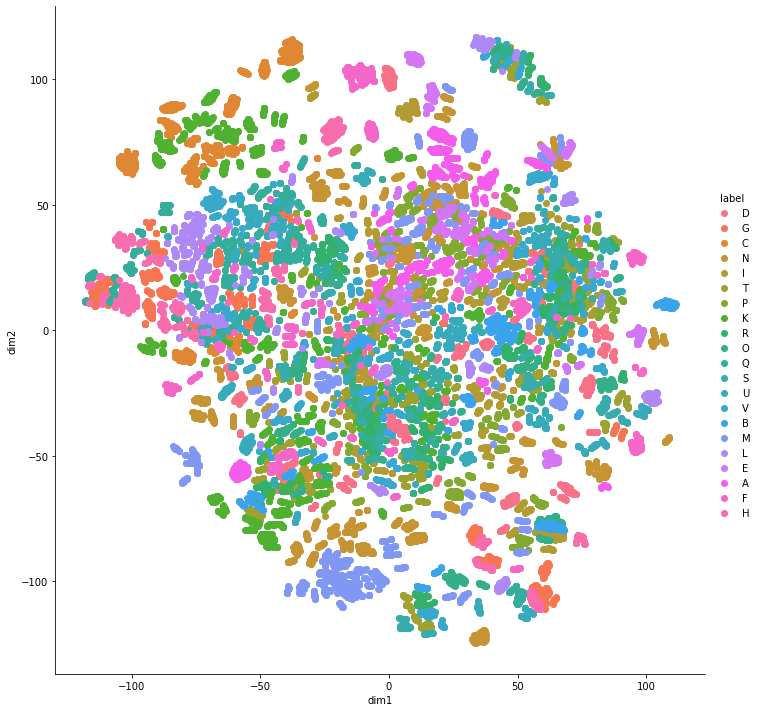

In [26]:
model = TSNE(n_components=2, random_state=0, perplexity=130, n_iter=3000)
tsne_data = model.fit_transform(data)

tsne_data = np.vstack((tsne_data.T, label)).T
df_tsne = pd.DataFrame(data= tsne_data, columns=('dim1', 'dim2', 'label'))

sns.FacetGrid(df_tsne, hue='label', height=10).map(plt.scatter, 'dim1', 'dim2').add_legend()

In [27]:
label.describe()

count     27455
unique       21
top           N
freq       2430
Name: label, dtype: object

In [28]:
label.value_counts()

N    2430
K    2310
M    2143
O    1294
L    1241
T    1225
F    1204
P    1199
D    1196
Q    1186
U    1164
I    1162
R    1161
C    1144
A    1126
V    1118
G    1090
S    1082
H    1013
B    1010
E     957
Name: label, dtype: int64

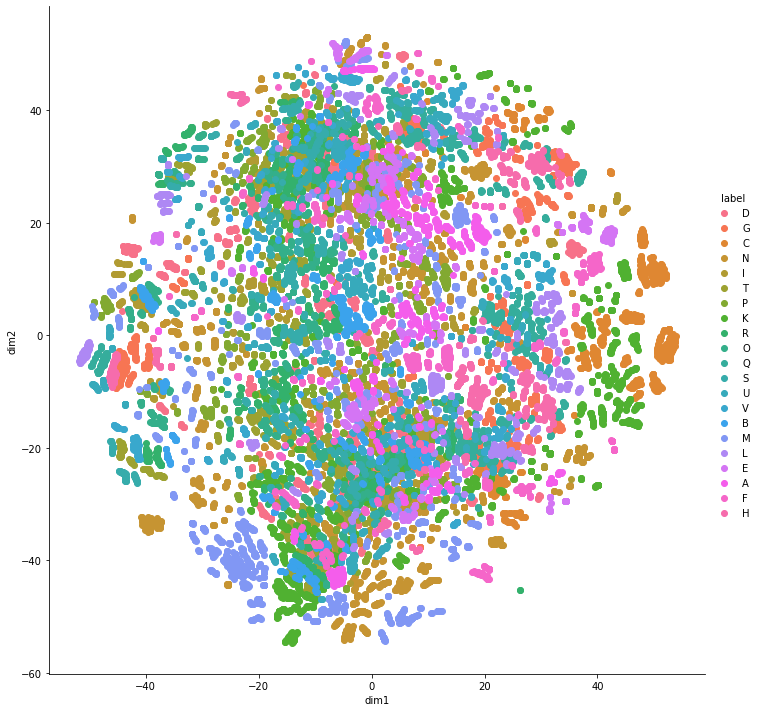

In [29]:
model = TSNE(n_components=2, random_state=0, perplexity=600, n_iter=1000)
tsne_data = model.fit_transform(data)

tsne_data = np.vstack((tsne_data.T, label)).T
df_tsne = pd.DataFrame(data= tsne_data, columns=('dim1', 'dim2', 'label'))

sns.FacetGrid(df_tsne, hue='label', height=10).map(plt.scatter, 'dim1', 'dim2').add_legend()

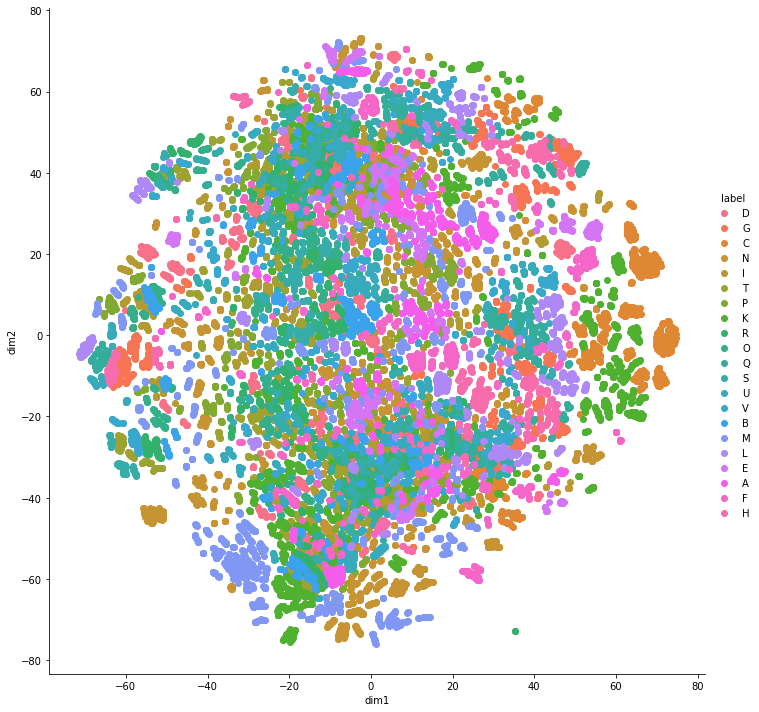

In [30]:
model = TSNE(n_components=2, random_state=0, perplexity=600, n_iter=3000)
tsne_data = model.fit_transform(data)

tsne_data = np.vstack((tsne_data.T, label)).T
df_tsne = pd.DataFrame(data= tsne_data, columns=('dim1', 'dim2', 'label'))

sns.FacetGrid(df_tsne, hue='label', height=10).map(plt.scatter, 'dim1', 'dim2').add_legend()

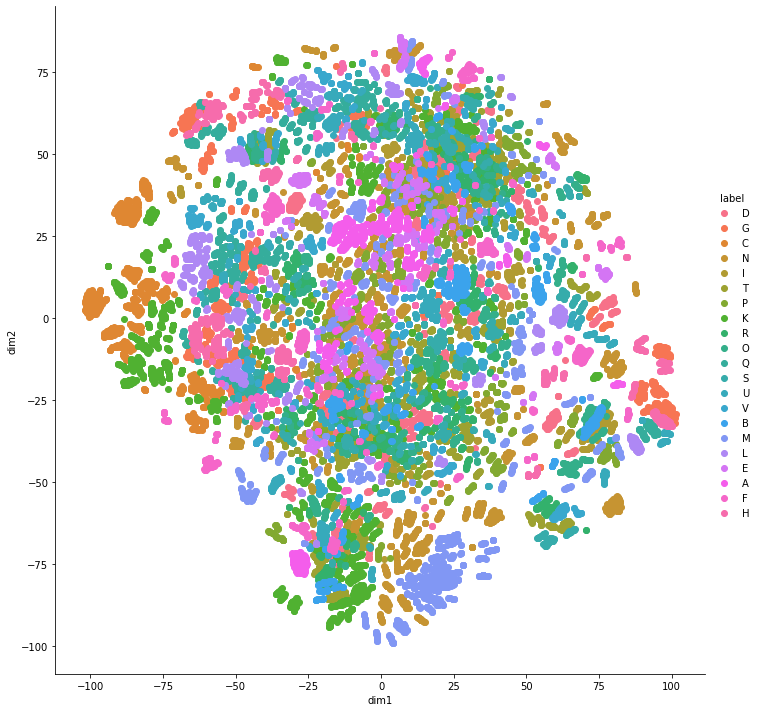

In [31]:
model = TSNE(n_components=2, random_state=0, perplexity=300, n_iter=3000)
tsne_data = model.fit_transform(data)

tsne_data = np.vstack((tsne_data.T, label)).T
df_tsne = pd.DataFrame(data= tsne_data, columns=('dim1', 'dim2', 'label'))

sns.FacetGrid(df_tsne, hue='label', height=10).map(plt.scatter, 'dim1', 'dim2').add_legend()

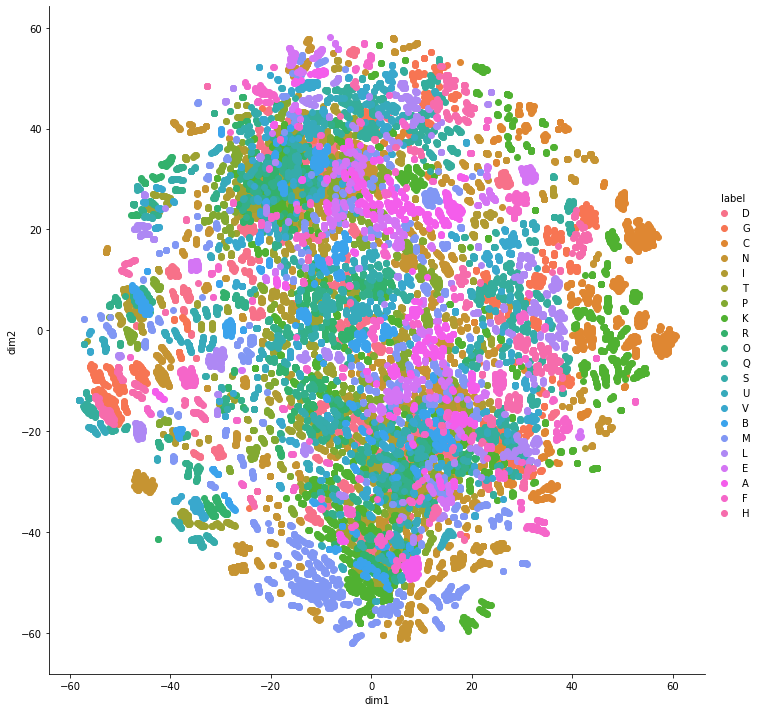

In [32]:
model = TSNE(n_components=2, random_state=0, perplexity=900, n_iter=3000)
tsne_data = model.fit_transform(data)

tsne_data = np.vstack((tsne_data.T, label)).T
df_tsne = pd.DataFrame(data= tsne_data, columns=('dim1', 'dim2', 'label'))

sns.FacetGrid(df_tsne, hue='label', height=10).map(plt.scatter, 'dim1', 'dim2').add_legend()